# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы ФИО ГРУППА
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [344]:
import itertools
import networkx as nx
import numpy.random as rnd
import matplotlib.pyplot as plt
import math

In [345]:
graph = nx.Graph()
graph

In [346]:
graph.add_node('A')
graph.add_node('B')
graph.add_node('C')

graph.nodes()


NodeView(('A', 'B', 'C'))

In [347]:
def add_edge(f_item, s_item, graph = None):
    graph.add_edge(f_item, s_item)
    graph.add_edge(s_item, f_item)

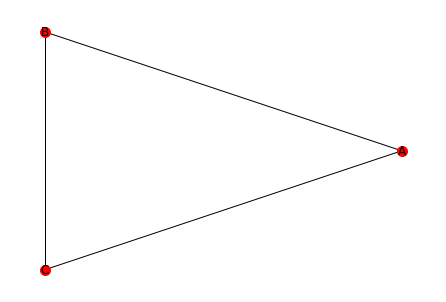

In [348]:
add_edge('A','B',graph)
add_edge('C','B',graph)
add_edge('A','C',graph)

nx.draw_circular(graph, node_color = 'red', node_size = 100, with_labels = True)

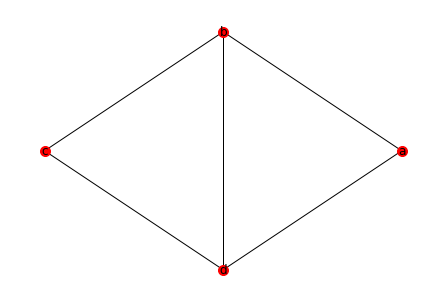

In [349]:
cities = {'a':(0,20),
        'b':(15,24),
        'c':(15,41),
        'd':(10,40)}
graph = nx.Graph()
graph.add_nodes_from(cities)
kilometres = {('a','b',15),
            ('b','c',16),
            ('b','d',25),
            ('c','d',14),
            ('d','a',18),
            }
graph.add_weighted_edges_from((kilometres))
nx.draw_circular(graph, node_color = 'red', node_size = 100, with_labels = True)

## Класс графа, для задачи ребер и вершин

In [350]:
# Python program for Dijkstra's single
# source shortest path algorithm. The program is
# for adjacency matrix representation of the graph
class Graph():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
 
    def printSolution(self, dist, finish):
        print("Vertex \t Distance from Source")
        for node in range(self.V):
            if node == finish:
                print(node, "\t\t", dist[node])
 
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minDistance(self, dist, sptSet):
 
        # Initialize minimum distance for next node
        min = 1e7
 
        # Search not nearest vertex not in the
        # shortest path tree
        for v in range(self.V):
            if dist[v] < min and sptSet[v] == False:
                min = dist[v]
                min_index = v
 
        return min_index
 
    # Function that implements Dijkstra's single source
    # shortest path algorithm for a graph represented
    # using adjacency matrix representation
    def dijkstra(self, src, finish):
 
        dist = [1e7] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
 
        for cout in range(self.V):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minDistance(dist, sptSet)
 
            # Put the minimum distance vertex in the
            # shortest path tree
            sptSet[u] = True
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):
                if (self.graph[u][v] > 0 and
                   sptSet[v] == False and
                   dist[v] > dist[u] + self.graph[u][v]):
                    dist[v] = dist[u] + self.graph[u][v]
 
        self.printSolution(dist, finish)
    

In [351]:
g = Graph(9)
           #a  b  c  d  e  f  g  h  i  
mtx =     [[0, 4, 0, 0, 0, 0, 0, 8, 0],
           [4, 0, 8, 0, 0, 0, 0, 11, 0],
           [0, 8, 0, 7, 0, 4, 0, 0, 2],
           [0, 0, 7, 0, 9, 14, 0, 0, 0],
           [0, 0, 0, 9, 0, 10, 0, 0, 0],
           [0, 0, 4, 14, 10, 0, 2, 0, 0],
           [0, 0, 0, 0, 0, 2, 0, 1, 6],
           [8, 11, 0, 0, 0, 0, 1, 0, 7],
           [0, 0, 2, 0, 0, 0, 6, 7, 0]
           ]
g.graph = mtx
g.dijkstra(0, 8)

Vertex 	 Distance from Source
8 		 14


In [352]:
def dijkstra(graph, src):
    # init
    visited = []
    distance = {src: 0}
    node = list(range(len(graph[0])))
    if src in node:
        node.remove(src)
        visited.append(src)
    else:
        return None
    for i in node:
        distance[i] = graph[src][i]
    prefer = src
    while node:
        _distance = float('inf')
        for i in visited:
            for j in node:
                if graph[i][j] > 0:
                    if _distance > distance[i] + graph[i][j]:
                        _distance = distance[j] = distance[i] + graph[i][j]
                        prefer = j
        visited.append(prefer)
        node.remove(prefer)
    return distance

In [353]:
class MyGraph():
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]

    def delete_vericles(self, verticles):
        if verticles == 0:
            print('u are dumb')
        else:
            for row in range(len(self.graph)):
                self.graph[row][verticles] = -1
            for collum in range(len(self.graph)):
                self.graph[verticles][collum] = -1
        return self.graph
    def show_mtx(self):
        for row in range(len(self.graph)):
            for collum in range(len(self.graph)):
                print(self.graph[row][collum], end = ' ')
            print()

In [354]:
# g = MyGraph(9)
#            #a  b  c  d  e  f  g  h  i  
# mtx =     [[0, 4, 0, 0, 0, 0, 0, 8, 0],
#            [4, 0, 8, 0, 0, 0, 0, 11, 0],
#            [0, 8, 0, 7, 0, 4, 0, 0, 2],
#            [0, 0, 7, 0, 9, 14, 0, 0, 0],
#            [0, 0, 0, 9, 0, 10, 0, 0, 0],
#            [0, 0, 4, 14, 10, 0, 2, 0, 0],
#            [0, 0, 0, 0, 0, 2, 0, 1, 6],
#            [8, 11, 0, 0, 0, 0, 1, 0, 7],
#            [0, 0, 2, 0, 0, 0, 6, 7, 0]
#            ]
# g.graph = mtx
# g.show_mtx()
# print("___")
# g.graph = g.delete_vericles(1)
# g.show_mtx()
            #  a  b  c  d  e  f
graph_list = [[0, 1, 0, 7, 0, 0],#a
              [1, 0, 4, 2, 3, 4],#b
              [2, 1, 0, 1, 2, 4],#c
              [7, 5, 2, 0, 3, 3],#d
              [2, 4, 3, 4, 0, 1],#e
              [0, 4, 7, 3, 1, 0]]#f
print(dijkstra(graph_list, 0))


{0: 0, 1: 2, 2: 1, 3: 2, 4: 3, 5: 4}


### Вывод